In [56]:
import pandas as pd
import requests
import json
from urllib.parse import urlencode
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [135]:
# Извлекаем данные из Я.Метрики
base_url = 'https://api-metrika.yandex.net/stat/v1/data?'
params = {'metrics': 'ym:s:visits',
'dimensions': ['ym:s:date','ym:s:browser', 'ym:s:isRobot'],
'id': '44147844'}
url = base_url + urlencode(params, doseq=True)
query = requests.get(url)
json_data = json.loads(query.text)
visits_data = pd.DataFrame([(
i['dimensions'][0]['name'],i['dimensions'][1]['name'],i['dimensions'][2]['name'],
i['metrics'][0]) for i in json_data['data']],
columns=['date','browser','user_type','visits'])

In [136]:
visits_data=visits_data.sort_values('date')

In [137]:
visits_data

date         browser user_type  visits
60  2021-05-29         Firefox    Robots     8.0
48  2021-05-29          Safari    People    10.0
19  2021-05-29   Chrome Mobile    People    38.0
53  2021-05-29            Edge    Robots     9.0
22  2021-05-29   Google Chrome    Robots    33.0
..         ...             ...       ...     ...
72  2021-06-04            Edge    Robots     6.0
11  2021-06-04   Google Chrome    Robots    71.0
7   2021-06-04   Google Chrome    People    93.0
98  2021-06-04           Opera    Robots     3.0
99  2021-06-04  Yandex Browser    Robots     3.0

[100 rows x 4 columns]

**Строим график посещений сайта роботами и людьми**

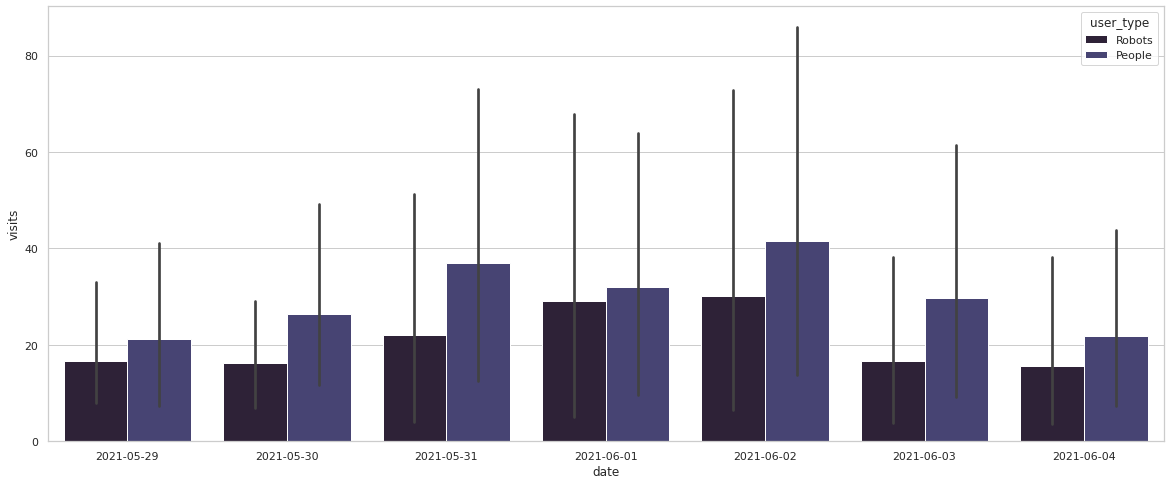

In [138]:
sns.set(style='whitegrid',palette='mako',rc={'figure.figsize':(20,8)})
sns.barplot(x='date',y='visits',data=visits_data,hue='user_type',order=visits_data.date.unique())

#можно отметить, что большего всего роботы посетили сайт 2021/06/02 , а люди 2021/05/31

**Определим долю посещений сайта по браузерам**

In [142]:
browser_data_grouped=visits_data.groupby('browser',as_index=False) \
            .agg({'visits':'sum'})

In [140]:
browser_data_grouped['CR']=browser_data_grouped.visits \
            .div(browser_data.visits.sum()).mul(100).round(2)

In [141]:
#По полученным данным видим, что наибольшая доля приходится на Google Chrome
browser_data_grouped.sort_values('CR',ascending=False)

browser  visits     CR
4        Google Chrome  1540.0  55.36
10      Yandex Browser   277.0   9.96
1        Chrome Mobile   269.0   9.67
3              Firefox   189.0   6.79
8               Safari   112.0   4.03
2                 Edge   105.0   3.77
6        Mobile Safari   101.0   3.63
7                Opera    49.0   1.76
9     Samsung Internet    30.0   1.08
0      Android Browser    28.0   1.01
11  Yandex: mobile app    11.0   0.40
5                 MSIE     3.0   0.11

**Выясним, с какого браузера приходит больше всего ботов.**

In [169]:
bot_vs_people_data=visits_data.groupby(['browser','user_type'],as_index=False) \
            .agg({'visits':'sum'})

In [188]:
bot_vs_people_data

browser user_type  visits
0      Android Browser    People    28.0
1        Chrome Mobile    People   269.0
2                 Edge    People    56.0
3                 Edge    Robots    49.0
4              Firefox    People    86.0
5              Firefox    Robots   103.0
6        Google Chrome    People  1051.0
7        Google Chrome    Robots   489.0
8                 MSIE    Robots     3.0
9        Mobile Safari    People   101.0
10               Opera    People    33.0
11               Opera    Robots    16.0
12              Safari    People    96.0
13              Safari    Robots    16.0
14    Samsung Internet    People    26.0
15    Samsung Internet    Robots     4.0
16      Yandex Browser    People   270.0
17      Yandex Browser    Robots     7.0
18  Yandex: mobile app    People    11.0

In [184]:
bot_data=bot_vs_people_data.query('user_type=="Robots"').merge(browser_data_grouped, on='browser')

In [185]:
bot_data['bot_CR']=(100*bot_data.visits_x / bot_data.visits_y).round(2)

In [186]:
#Из полученных результатов видно, что это браузер MSIE
bot_data.sort_values('bot_CR',ascending=False)

browser user_type  visits_x  visits_y  bot_CR
3              MSIE    Robots       3.0       3.0  100.00
1           Firefox    Robots     103.0     189.0   54.50
0              Edge    Robots      49.0     105.0   46.67
4             Opera    Robots      16.0      49.0   32.65
2     Google Chrome    Robots     489.0    1540.0   31.75
5            Safari    Robots      16.0     112.0   14.29
6  Samsung Internet    Robots       4.0      30.0   13.33
7    Yandex Browser    Robots       7.0     277.0    2.53

**Построим график всех заходов на сайт от ботов и людей в разрезе по браузерам**

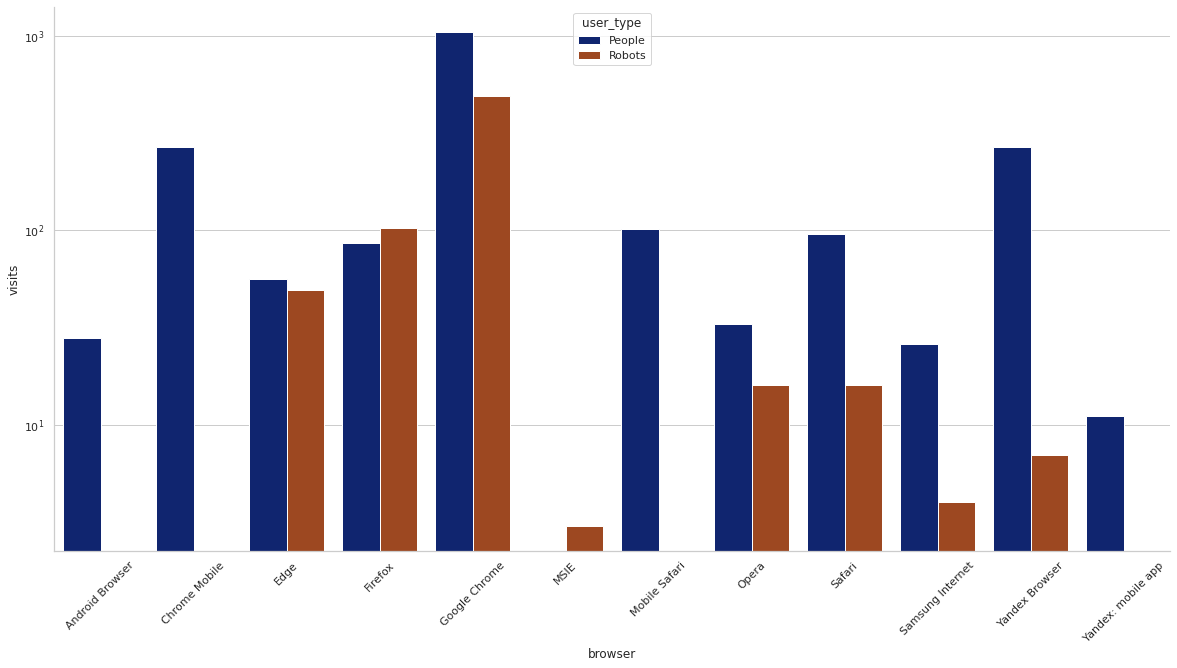

In [204]:
sns.set(style='whitegrid',palette='dark',rc={'figure.figsize':(20,10)})
sns.barplot(x='browser',y='visits',data=bot_vs_people_data,hue='user_type')
plt.yscale('log')
plt.xticks(rotation=45)
sns.despine()

In [ ]:
#Наибольшее число посетителей предпочитают браузер Google Chrome.